In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=8)     # fontsize of the axes title
plt.rc('axes', labelsize=8)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 8

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
data = pd.read_csv(f'{Project}/Documents/Revision_prep/Experiments/Marker-gene-Exp_adipogenesis-w-moreGlu/v20240925/Glu-Gln-ratio-moreGlu_result.tsv', sep='\t')
data_dict = {k: list(v) for k, v in data.groupby('Cond')['Glu/Gln']}

display(data_dict, data)

{'D0_Glu': [1.130381, 1.14659, 1.431124],
 'D0_none': [1.179255, 1.411856, 1.206107],
 'D4_Glu': [1.100791, 1.386663, 1.620495],
 'D4_none': [0.51765, 0.678928, 0.446369]}

,Cond,Glu/Gln
0,D0_none,1.179255
1,D0_none,1.411856
2,D0_none,1.206107
3,D0_Glu,1.130381
4,D0_Glu,1.146590
5,D0_Glu,1.431124
6,D4_none,0.517650
7,D4_none,0.678928
8,D4_none,0.446369
9,D4_Glu,1.100791


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_97304/3627344802.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="Cond", y='Glu/Gln',
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_97304/3627344802.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x="Cond", y='Glu/Gln',


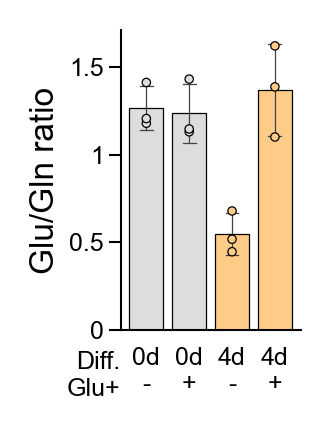

<Figure size 640x480 with 0 Axes>

In [14]:
err_kw = dict(lw=0.5, capsize=3, capthick=0.5)

sF = 1 # Size factor
wgap = 0.25
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [1/7*4 +1/70*2]
height_ratios = [1]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)


ax = fig.add_subplot(grid[0,0])

sns.barplot(data=data, x="Cond", y='Glu/Gln',
            palette=['#DDDDDD','#DDDDDD','#FFCC88','#FFCC88'], saturation=1,
            width=0.8,
            errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
            ax=ax, linewidth = 0.3, edgecolor='k',
            legend=False)

sns.stripplot(data=data, x="Cond", y='Glu/Gln',
            palette=['#DDDDDD','#DDDDDD','#FFCC88','#FFCC88'],
            size=2, linewidth=0.3, edgecolor='k',
            jitter=False,
            legend=False)

ax.set_xlim(-0.6, 3.6)
ax.set_xticks(range(4))
ax.set_yticks([0, 0.5, 1, 1.5])
ax.set_xticklabels(['0d\n-','0d\n+','4d\n-','4d\n+'], rotation=0)
ax.set_yticklabels([0, 0.5, 1, 1.5])
ax.tick_params(width=0.5, length=3, pad=1)
ax.tick_params(axis='x', length=0, pad=4)
ax.text(0, -0.07, 'Diff.', transform=ax.transAxes, ha='right', va='top', fontsize=6)
ax.text(0, -0.16, 'Glu+', transform=ax.transAxes, ha='right', va='top', fontsize=6)

ax.set_xlabel('')
ax.set_ylabel('Glu/Gln ratio', labelpad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


plt.savefig('Glu-Gln-ratio-moreGlu_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()

In [5]:
# Unpaired T-test
from scipy import stats

stat, pv = stats.ttest_ind(data[data['Cond']=='D0_none']['Glu/Gln'], 
                           data[data['Cond']=='D0_Glu']['Glu/Gln'])
print(stat, pv)

stat, pv = stats.ttest_ind(data[data['Cond']=='D0_none']['Glu/Gln'], 
                           data[data['Cond']=='D4_none']['Glu/Gln'])
print(stat, pv)

stat, pv = stats.ttest_ind(data[data['Cond']=='D4_none']['Glu/Gln'], 
                           data[data['Cond']=='D4_Glu']['Glu/Gln'])
print(stat, pv)

0.2430913432727914 0.8198917636263683
7.134830892292748 0.0020406962498879157
-4.97160284690083 0.007642777780828374
